<a href="https://colab.research.google.com/github/shreyashrawat/FineTuning-CNN/blob/master/Fine_tuning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/food-datasets/Food-5K.zip

--2020-08-07 05:10:40--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/food-datasets/Food-5K.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.245.128
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.245.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446919921 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.22M  22.5MB/s    in 20s     

2020-08-07 05:11:01 (21.2 MB/s) - ‘Food-5K.zip’ saved [446919921/446919921]



In [2]:
!unzip Food-5K.zip

Streaming output truncated to the last 5000 lines.
  inflating: evaluation/0_106.jpg    
  inflating: evaluation/0_107.jpg    
  inflating: evaluation/0_108.jpg    
  inflating: evaluation/0_109.jpg    
  inflating: evaluation/0_11.jpg     
  inflating: evaluation/0_110.jpg    
  inflating: evaluation/0_111.jpg    
  inflating: evaluation/0_112.jpg    
  inflating: evaluation/0_113.jpg    
  inflating: evaluation/0_114.jpg    
  inflating: evaluation/0_115.jpg    
  inflating: evaluation/0_116.jpg    
  inflating: evaluation/0_117.jpg    
  inflating: evaluation/0_118.jpg    
  inflating: evaluation/0_119.jpg    
  inflating: evaluation/0_12.jpg     
  inflating: evaluation/0_120.jpg    
  inflating: evaluation/0_121.jpg    
  inflating: evaluation/0_122.jpg    
  inflating: evaluation/0_123.jpg    
  inflating: evaluation/0_124.jpg    
  inflating: evaluation/0_125.jpg    
  inflating: evaluation/0_126.jpg    
  inflating: evaluation/0_127.jpg    
  inflating: evaluation/0_128.jpg    

In [3]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input, VGG16

In [5]:
len(os.listdir("./validation"))

1001

In [32]:
def load_data(directory, dir):

  X = []
  y = []
  for img in os.listdir(directory + dir):
    if img.endswith("jpg"):
      image = load_img(directory+dir+img, target_size = (224,224))
      
      image = img_to_array(image)
      # image = preprocess_input(image)
      X.append(image)
      y.append(int(img[0]))
  return np.stack(X), y
    


In [5]:
X_train, y_train = load_data("./", "training/")

In [33]:

X_test, y_test = load_data("./", "validation/")

In [6]:
y_train, y_test = np.array(y_train), np.array(y_test)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


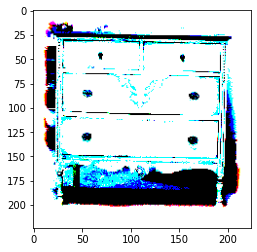

In [34]:
plt.imshow(X_train[1])

In [19]:
base_model = VGG16(input_shape = (224,224,3), weights = "imagenet", include_top = False)

In [20]:
pool = keras.layers.GlobalAveragePooling2D()

In [21]:
pred = keras.layers.Dense(1, "sigmoid")

In [22]:
base_model.trainable = False

In [23]:
model = keras.models.Sequential([
                                 base_model,
                                 pool,
                                 pred
])

In [24]:
model.compile(loss = "binary_crossentropy", optimizer="Adam", metrics = ["acc"])

In [25]:
history = model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), epochs = 5, batch_size=32)

Epoch 1/5
94/94 [==============================] - 29s 308ms/step - loss: 1.3474 - acc: 0.7657 - val_loss: 0.2334 - val_acc: 0.9360
Epoch 2/5
94/94 [==============================] - 29s 306ms/step - loss: 0.2606 - acc: 0.9350 - val_loss: 0.1527 - val_acc: 0.9660
Epoch 3/5
94/94 [==============================] - 29s 307ms/step - loss: 0.1536 - acc: 0.9593 - val_loss: 0.1080 - val_acc: 0.9700
Epoch 4/5
94/94 [==============================] - 29s 306ms/step - loss: 0.1074 - acc: 0.9680 - val_loss: 0.0840 - val_acc: 0.9750
Epoch 5/5
94/94 [==============================] - 29s 306ms/step - loss: 0.0798 - acc: 0.9750 - val_loss: 0.0989 - val_acc: 0.9740


In [29]:
X_fin_test, y_fin_test = load_data("./", "evaluation/")

In [28]:
y_fin_test = np.array(y_fin_test)
model.evaluate(X_fin_test, y_fin_test)

32/32 [==============================] - 7s 222ms/step - loss: 0.1549 - acc: 0.9470


[0.15489761531352997, 0.9470000267028809]

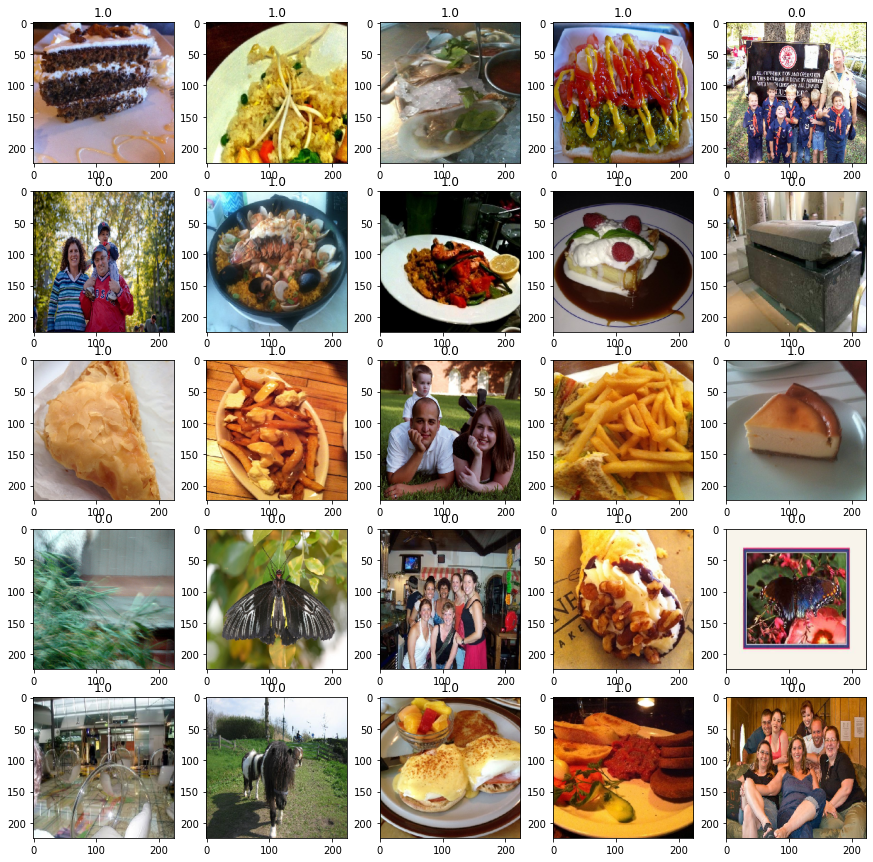

In [36]:
plt.figure(figsize = (15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i].astype("uint8"))
  img = preprocess_input(X_test[i])
  img = np.expand_dims(img, 0)
  pred = model.predict(img)
  pred = round(pred[0][0])
  plt.title(pred)
plt.show()